<a href="https://colab.research.google.com/github/preetirawat2001/Projects_/blob/main/ml_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importng libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

reading file

In [7]:
df = pd.read_csv('/content/adult.csv')


Exploratory data analysis

In [8]:
df.shape
#We can see that there are 32561 instances and 15 attributes in the data set.

(32560, 15)

In [9]:
df.head()
#View top 5 rows of dataset

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns.

In [10]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [12]:
#View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that there are no missing values in the dataset.

In [13]:
#There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.
#First of all, I will explore categorical variables.
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [14]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


There are 9 categorical variables.
The categorical variables are given by workclass, education, marital_status, occupation, relationship, race, sex, native_country and income.
income is the target variable.

In [15]:
#First, explore the categorical variables.
#Missing values in categorical variables.
# check missing values in categorical variables

df[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0
income,0


there is no missing value in categorical variable

Now, we will check the frequency counts of categorical variables.

In [16]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(df[var].value_counts())

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
occupation
 Prof-specialty       4140
 Craft-repair 

In [18]:
# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/float(len(df)))

workclass
 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: count, dtype: float64
education
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: count, dtype: float64
marital_status
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-s

Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it do not consider ? as missing values. So, we have to replace ? with NaN so that Python can detect these missing values.

Explore these variables and replace ? with NaN.

In [19]:
#Explore workclass variable
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


We can see that there are 1836 values encoded as ? in workclass variable. We will replace these ? with NaN.

In [27]:
df['workclass'].replace(' ?', np.NaN, inplace=True)

In [28]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


Now, we can see that there are no values encoded as ? in the workclass variable.

adopt similar approach with occupation and native_country column.

In [30]:
#Explore occupation variable
# check labels in occupation variable

df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [31]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3769
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [33]:
#Replacing ? with nan
df['occupation'].replace(' ?', np.NaN, inplace=True)

In [34]:
#Explore native_country variable
# check labels in native_country variable

df.native_country.unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [36]:
df.native_country.value_counts()

,count
native_country,
United-States,29169
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [37]:
#replacing ? with nan
df['native_country'].replace(' ?', np.NaN, inplace=True)

In [38]:
df.native_country.value_counts()

,count
native_country,
United-States,29169
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


Check missing values in categorical variables again

In [39]:
df[categorical].isnull().sum()

,0
workclass,1836
education,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0
native_country,583
income,0


Now, we can see that workclass, occupation and native_country variable contains missing values.

Number of labels: cardinality

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, we will check for high cardinality.

In [40]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


native_country column contains relatively large number of labels as compared to other columns. We will check for cardinality after train-test split.

Explore Numerical Variables

In [41]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [42]:
# view the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


Summary of numerical variables

There are 6 numerical variables.
These are given by age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.
All of the numerical variables are of discrete data type.

Explore problems within numerical variables

Now, we will explore the numerical variables.

Missing values in numerical variables

In [44]:
# check missing values in numerical variables

df[numerical].isnull().sum()

,0
age,0
fnlwgt,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0


All the 6 numerical variables do not contain missing values.

Declare feature vector and target variable

In [45]:
X = df.drop(['income'], axis=1)

y = df['income']

Split data into separate training and test set

In [46]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

This code is splitting your dataset (X for features and y for labels) into training and testing sets. Here's what each part does:

train_test_split(X, y, test_size=0.3, random_state=0): This function splits your data into two parts:

X: Feature matrix (the input data).
y: Target labels (the output you want to predict).
test_size=0.3: Specifies that 30% of the data should be used for testing, while 70% is used for training.
random_state=0: Ensures reproducibility of the split. Setting a fixed random_state allows you to get the same split every time you run the code.
X_train, X_test:

X_train is the 70% of the features used to train the model.
X_test is the 30% of the features used to evaluate the model's performance.
y_train, y_test:

y_train contains the corresponding labels for X_train, used during training.
y_test contains the corresponding labels for X_test, used to assess the model's predictions.

In summary, this code separates the data into training and testing sets, which are essential for building machine learning models and evaluating their performance.

In [47]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9768, 14))

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. Carry out feature engineering on different types of variables.

First, display the categorical and numerical variables again separately.

In [48]:
# check data types in X_train

X_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [49]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [50]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [51]:
#Engineering missing values in categorical variables¶
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

,0
workclass,0.057213
education,0.000000
marital_status,0.000000
occupation,0.057389
relationship,0.000000
race,0.000000
sex,0.000000
native_country,0.018252


In [52]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.057213057213057215
occupation 0.05738855738855739
native_country 0.018252018252018252


X_train[col].isnull().mean():

X_train[col]: Selects a specific categorical column from the X_train dataset.
.isnull(): Returns a Boolean Series where True indicates a missing value (NaN), and False indicates a non-missing value.
.mean(): Calculates the mean of this Boolean Series, which gives the proportion of missing values in that column (since True is treated as 1 and False as 0).
if X_train[col].isnull().mean() > 0:: Checks if the proportion of missing values in the column is greater than 0, i.e., there are missing values.

print(col, (X_train[col].isnull().mean())): Prints the name of the column (col) and the proportion of missing values in that column.

In [53]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

for df2 in [X_train, X_test]:

This loop iterates over the X_train and X_test datasets. df2 will first represent X_train, and in the next iteration, it will represent X_test.
df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True):

df2['workclass']: Refers to the workclass column in the current dataset (X_train or X_test).
fillna(X_train['workclass'].mode()[0]): The .fillna() function is used to fill missing values (NaN) with a specified value.

X_train['workclass'].mode()[0]: This retrieves the most frequent value (mode) from the workclass column in the X_train dataset. The [0] ensures that if there are multiple modes, the first one is selected.

inplace=True: This argument makes the changes directly in the dataset without needing to assign it back.

In [54]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [55]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [56]:
#As a final check, I will check for missing values in X_train and X_test.

# check missing values in X_train

X_train.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [57]:
# check missing values in X_test

X_test.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


We can see that there are no missing values in X_train and X_test.

In [59]:
#Encode categorical variables¶
# print categorical variables

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [60]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
20721,Self-emp-inc,Some-college,Married-civ-spouse,Transport-moving,Husband,Black,Male,Haiti
32097,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25205,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Bachelors,Never-married,Farming-fishing,Not-in-family,White,Male,United-States
12367,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Male,India


In [66]:
# import category encoders
!pip install category_encoders

import category_encoders as ce

The category_encoders library is used for encoding categorical variables into numerical formats that machine learning algorithms can process.

Actually i run the one hot encoding first that's why it transform the data

In [68]:
print(X_train.columns)


Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'fnlwgt',
       ...
       'native_country_32', 'native_country_33', 'native_country_34',
       'native_country_35', 'native_country_36', 'native_country_37',
       'native_country_38', 'native_country_39', 'native_country_40',
       'native_country_41'],
      dtype='object', length=105)


In [70]:
# encode remaining variables with one-hot encoding

#encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                # 'race', 'sex', 'native_country'])

#X_train = encoder.fit_transform(X_train)

#X_test = encoder.transform(X_test)

Each categorical variable in the columns specified ('workclass', 'education', etc.) is transformed into several binary columns, one for each unique category in that variable. For example, if workclass has categories like Private, Self-Employed, and Government, three new columns will be created: workclass_Private, workclass_Self-Employed, and workclass_Government. The original workclass column will be removed.
The binary columns will have a 1 if the original value was that category, and a 0 otherwise.

In [71]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
20721,32,1,0,0,0,0,0,0,0,343872,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,61778,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,108495,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X_train.shape

(22792, 105)

We can see that from the initial 14 columns, we now have 113 columns.

Similarly, we will take a look at the X_test set.

In [73]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,40,1,0,0,0,0,0,0,0,193524,...,0,0,0,0,0,0,0,0,0,0
8950,46,0,1,0,0,0,0,0,0,188027,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,1,0,0,0,0,0,0,202498,...,0,0,0,0,0,0,0,0,0,0
16505,21,0,1,0,0,0,0,0,0,184756,...,0,0,0,0,0,0,0,0,0,0
19140,59,0,1,0,0,0,0,0,0,106748,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X_test.shape

(9768, 105)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling.

Feature Scaling

In [75]:
cols = X_train.columns

In [76]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Why Use RobustScaler?
Resistant to Outliers: Unlike scalers like StandardScaler, which use the mean and standard deviation, RobustScaler uses the median and IQR, making it more robust to outliers.
Preserves Data Structure: It scales the data without completely distorting it in the presence of extreme values, which can be particularly important in some machine learning models.
Example:
For a given feature (before scaling):

If the median is 10 and the interquartile range (IQR) is 5, the transformation for a data point with a value of 12 would be:
Scaled value=(12-10)/5=0.4
After scaling, all features in both X_train and X_test will have reduced influence from any outliers, making the data more suitable for machine learning models that are sensitive to feature scaling.

In [77]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [79]:
X_test=pd.DataFrame(X_test, columns=[cols])

In [81]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.25,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.374471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.066379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.582591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.974966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.585881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier.

# **Model training**

In [82]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

Predict the results

In [83]:
y_pred = gnb.predict(X_test)

y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

# Check accuracy score

In [84]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8164


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy

Now, we will compare the train-set and test-set accuracy to check for overfitting.

In [85]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [86]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8089


Check for overfitting and underfitting

In [87]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8089
Test set score: 0.8164


The training-set accuracy score is 0.8089 while the test-set accuracy to be 0.8164. These two values are quite comparable. So, there is no sign of overfitting.

Compare model accuracy with null accuracy.
So, the model accuracy is 0.8164. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [88]:
# check class distribution in test set

y_test.value_counts()

,count
income,
<=50K,7454
>50K,2314


We can see that the occurences of most frequent class is 7454. So, we can calculate null accuracy by dividing 7407 by total number of occurences.

In [89]:
# check null accuracy score

null_accuracy = (7454/(7454+2314))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7631


We can see that our model accuracy score is 0.8164 but null accuracy score is 0.7631. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [90]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6105 1349]
 [ 444 1870]]

True Positives(TP) =  6105

True Negatives(TN) =  1870

False Positives(FP) =  1349

False Negatives(FN) =  444


The confusion matrix shows 6105 + 1870 = 7975 correct predictions and 1349 + 444 = 1793 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 6105

True Negatives (Actual Negative:0 and Predict Negative:0) - 1870

False Positives (Actual Negative:0 but Predict Positive:1) - 1349 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 444 (Type II error)

<Axes: >

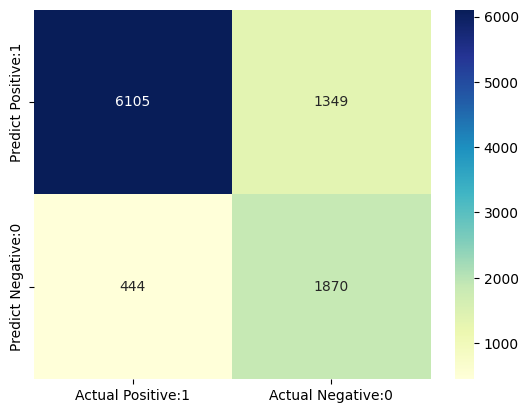

In [91]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices

Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. We have described these terms in later.

We can print a classification report as follows:-

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.82      0.87      7454
        >50K       0.58      0.81      0.68      2314

    accuracy                           0.82      9768
   macro avg       0.76      0.81      0.77      9768
weighted avg       0.85      0.82      0.83      9768



Classification accuracy

In [93]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [94]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8164


Classification error

In [95]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1836


Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [96]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8190


Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [97]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9322



True Positive Rate is synonymous with Recall.

In [98]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9322


False Positive Rate

In [99]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4191


In [100]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5809


f1-score

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

Support
Support is the actual number of occurrences of the class in our dataset.

# Calculate class probabilities

In [101]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[5.65187154e-02, 9.43481285e-01],
       [9.99977898e-01, 2.21021023e-05],
       [9.99998716e-01, 1.28437690e-06],
       [9.99999999e-01, 1.14553388e-09],
       [9.99844406e-01, 1.55594116e-04],
       [1.45695734e-01, 8.54304266e-01],
       [9.99999934e-01, 6.55033777e-08],
       [9.99534858e-01, 4.65142119e-04],
       [9.85081734e-01, 1.49182659e-02],
       [9.99999992e-01, 8.45327133e-09]])

# Observations
In each row, the numbers sum to 1.
There are 2 columns which correspond to 2 classes - <=50K and >50K.

Class 0 => <=50K - Class that a person makes less than equal to 50K.

Class 1 => >50K - Class that a person makes more than 50K.

Importance of predicted probabilities

We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

In [102]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.056519,9.434813e-01
1,0.999978,2.210210e-05
2,0.999999,1.284377e-06
3,1.000000,1.145534e-09
4,0.999844,1.555941e-04
5,0.145696,8.543043e-01
6,1.000000,6.550338e-08
7,0.999535,4.651421e-04
8,0.985082,1.491827e-02
9,1.000000,8.453271e-09


In [103]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([9.43481285e-01, 2.21021023e-05, 1.28437690e-06, 1.14553388e-09,
       1.55594116e-04, 8.54304266e-01, 6.55033777e-08, 4.65142119e-04,
       1.49182659e-02, 8.45327133e-09])

In [104]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

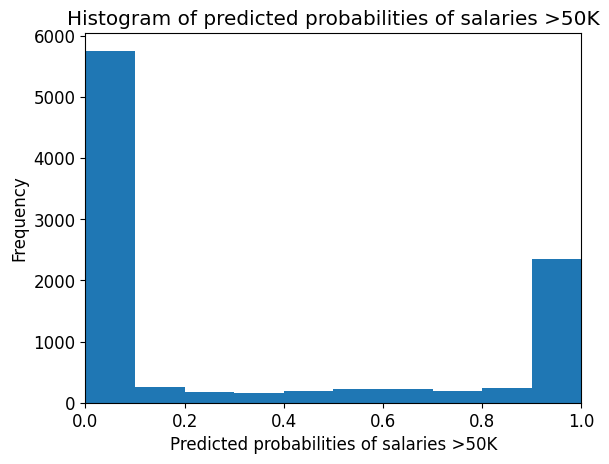

In [105]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

Observations

We can see that the above histogram is highly positive skewed.
The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary is <=50K.
There are relatively small number of observations with probability > 0.5.
So, these small number of observations predict that the salaries will be >50K.
Majority of observations predcit that the salaries will be <=50K.

# **Results and conclusion**


In this project, we build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the model accuracy which was found to be 0.8164.
The training-set accuracy score is 0.8089 . while the test-set accuracy to be 0.8164. These two values are quite comparable. So, there is no sign of overfitting.
I have compared the model accuracy score which is 0.8164 . with null accuracy score which is 0.7631. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.